In [1]:
import pandas

csv = pandas.read_csv(r"C:\Users\victo\Desktop\Files\Tech\Code\Python\EVops\testing\dft_rawcount_local_authority_id_65.csv")

In [2]:
latitude = list(csv.columns).index("latitude")
longitude = list(csv.columns).index("longitude")
latitudes = []
longitudes = []
pairs = []
for row in csv.values:
    lat = float(row[latitude])
    longi = float(row[longitude])
    if not([lat,longi] in pairs):
        latitudes.append(lat)
        longitudes.append(longi)
        pairs.append([lat,longi])

In [3]:
import numpy as np
distance_limit = 0.05
neighbors = {i: () for i in range(len(latitudes))}
distances = {}
points = sorted([[latitudes[i], longitudes[i]]
                for i in range(len(latitudes))])

for point_1 in range(len(points)):
    for point_2 in range(point_1+1, len(points)):
        point1 = np.array(points[point_1])
        point2 = np.array(points[point_2])
        distance = np.linalg.norm(point1-point2)
        if distance <= distance_limit:
            neighbors[point_1] = tuple(
                list(neighbors[point_1]) + [point_2])
            neighbors[point_2] = tuple(
                list(neighbors[point_2]) + [point_1])
            distances[tuple([point_1, point_2])] = distance

In [4]:
visited = set()
root = [1230,[1230]]
queue = [root]
head = 0

while head < len(queue) and len(queue) < 5000000:
    last,path = queue[head]
    new_states = neighbors[last]
    for state in new_states:
        if not state in path and not state in visited:
            queue.append([state,path+[state]])
            visited.add(state)
    head += 1

In [5]:
len(queue)

1390

1230 1265
1265 1245
1245 1148
1148 1169
1169 1118
1118 1114
1114 1088
1088 1067
1067 1044
1044 1071
1071 1061
1061 991
991 921
921 851
851 771
771 710
710 594
594 593
593 595
595 516
516 431
431 403
403 277
277 128
128 78
78 133
133 139
139 206
206 201
201 340
340 458
458 522
522 583
1230 1265
1265 1245
1245 1148
1148 1169
1169 1118
1118 1114
1114 1088
1088 1067
1067 1044
1044 1071
1071 1061
1061 991
991 921
921 851
851 771
771 710
710 594
594 593
593 595
595 516
516 431
431 403
403 277
277 128
128 78
78 133
133 139
139 206
206 201
201 340
340 458
458 578
1230 1265
1265 1245
1245 1148
1148 1169
1169 1118
1118 1114
1114 1088
1088 1067
1067 1044
1044 1071
1071 1061
1061 991
991 921
921 851
851 771
771 710
710 594
594 593
593 595
595 516
516 431
431 403
403 277
277 128
128 78
78 133
133 139
139 206
206 201
201 340
340 458
458 567
1230 1265
1265 1245
1245 1148
1148 1169
1169 1118
1118 1114
1114 1088
1088 1067
1067 1044
1044 1071
1071 1061
1061 991
991 921
921 851
851 771
771 710
710 594
59

KeyboardInterrupt: 

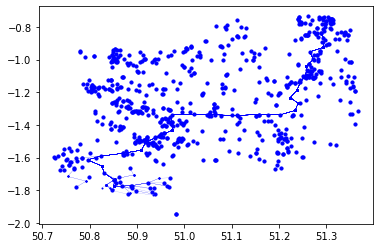

In [6]:
def plot_network(pts,ax):
    x =[points[point][0] for point in pts]
    y =[points[point][1] for point in pts]
    for i in range(0, len(pts)-1):
        print(pts[i],pts[i+1])
        ax.plot(x[i:i+2], y[i:i+2], 'bo-', markersize=1, linewidth=0.1)
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
counter = 0
fig, ax = plt.subplots()
for i in range(0,len(latitudes),2):
    x,y = latitudes[i],longitudes[i]
    # points = points_from_line([latitudes[i],longitudes[i]],[latitudes[i+1],longitudes[i+1]])
    # for point in points:
    ax.scatter(x,y,s=10,c="blue")
    # ax.plot(latitudes[i:i+2], longitudes[i:i+2], 'bo-', linewidth=0.1, markersize=1)
    
    counter += 1
for i in range(min(5000,len(queue))):
    plot_network(queue[-i][-1],ax)

In [70]:
points[0]

[50.72413402, -1.59576474]

In [68]:
points

[[50.72413402, -1.59576474],
 [50.726098, -1.6106097],
 [50.726309, -1.6010306],
 [50.730421, -1.5992104],
 [50.73042281, -1.59921037],
 [50.732496, -1.5906201],
 [50.7351396, -1.59793733],
 [50.73702993, -1.58815742],
 [50.737881, -1.6761952],
 [50.73788295, -1.67619519],
 [50.73803079, -1.67762545],
 [50.739122, -1.6007234],
 [50.73912393, -1.60072337],
 [50.74102402, -1.65210937],
 [50.74268709, -1.66108247],
 [50.744206, -1.576175],
 [50.74420815, -1.57617495],
 [50.74472572, -1.54640651],
 [50.74479605, -1.67538219],
 [50.749709, -1.6147939],
 [50.752087, -1.6080269],
 [50.753187, -1.5583033],
 [50.753322, -1.5307584],
 [50.753359, -1.7148451],
 [50.75373942, -1.55184807],
 [50.753743, -1.5462485],
 [50.7542716, -1.65561197],
 [50.755353, -1.5416965],
 [50.755915, -1.6463285],
 [50.75591648, -1.64632843],
 [50.75711326, -1.65560531],
 [50.758219, -1.6269024],
 [50.75822106, -1.62690239],
 [50.76011678, -1.62636275],
 [50.76032386, -1.55703106],
 [50.761011, -1.5330635],
 [50.76101

In [63]:
pts = [points[point][0] for point in queue[-1][-1]]
for i in range(len(pts)-1):
    print(queue[-1][-1][i])
    print(np.linalg.norm(pts[i]-pts[i+1]))

0
0.012895909999997457
7
0.007178220000000124
16
2.1500000002561137e-06


In [28]:
pairs[0]

[50.95654382, -1.45180444]

In [48]:
queue[-1][-1]

[0, 7, 16, 15]

In [50]:
neighbors[7]

(0, 2, 3, 4, 5, 6, 11, 12, 15, 16)

In [62]:
distances[(0,7)]

0.014972501872113225

In [60]:
print(p[0],pairs[7])

[50.95654382, -1.45180444] [50.89745274, -1.51008743]
